# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
# import packages
import pandas as pd
import requests
from PIL import Image
from io import BytesIO
import json

!pip install tweepy
import tweepy

In [2]:
# gather twitter archive enhanced data
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# gather image data
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)
with open('image_predictions.tsv', 'w') as file:
    file.write(r.text)
images = pd.read_csv('image_predictions.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [6]:
# gather additionl data from twitter API
consumer_key = '......'
consumer_secret = '......'
access_token = '......'
access_secret = '......'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [7]:
tweet_ids = twitter_archive['tweet_id'].values
with open('tweet_json.txt', 'w') as file2:
    for tweet_id in tweet_ids:
        try:
            tweet = api.get_status(tweet_id)
            json.dump(tweet._json, file2)
            file2.write('\n')
        except:
            continue
with open('tweet_json.txt', 'r') as f:
    tweets = pd.read_json('[' + ','.join(f.readlines()) + ']')

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



# twitter_archive 

In [10]:
# visualization analysis
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1448,696405997980676096,NaN,NaN,2016-02-07 18:51:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Berb. He just found out that they have...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/696405997...,7,10,Berb,None,None,None,None
2318,666454714377183233,NaN,NaN,2015-11-17 03:16:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I'll name the dogs from now on. This is Kreggo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666454714...,10,10,Kreggory,None,None,None,None
1873,675145476954566656,NaN,NaN,2015-12-11 02:49:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",What an honor. 3 dogs here. Blond one is clear...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675145476...,9,10,None,None,None,None,None
474,816091915477250048,NaN,NaN,2017-01-03 01:20:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Comet. He's a Wild Estonian Poofer. Su...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/816091915...,12,10,Comet,None,None,None,None
311,835297930240217089,NaN,NaN,2017-02-25 01:18:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Ash. He's a Benebop Cumberplop. Quite rar...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835297930...,12,10,Ash,None,None,None,None


In [11]:
# get statistic report
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [18]:
# check data type
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [19]:
# check null value
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [12]:
# check rating denominator value
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [13]:
# check rating numerator value
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [15]:
# check source value
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

# Tweets

In [20]:
# visualizational analysis of tweets data
tweets.sample(5)

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
240,NaN,NaN,2017-03-23 18:07:10,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,13912,False,NaN,844973813909606400,844973813909606400,...,NaN,NaN,NaN,2845,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Brady. He's a recovering alcoholic. De...,True,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
561,NaN,NaN,2016-11-20 21:00:48,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 776113296390942720, 'id_str'...",0,False,NaN,800443802682937345,800443802682937344,...,NaN,NaN,NaN,4012,False,{'created_at': 'Wed Sep 14 17:40:06 +0000 2016...,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sampson. He's about to ...,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
507,NaN,NaN,2016-12-14 00:57:20,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 808838232662081536, 'id_str'...",9619,False,NaN,808838249661788160,808838249661788160,...,NaN,NaN,NaN,2858,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Ito. He'll be your uber driver tonight...,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
761,NaN,NaN,2016-09-12 16:05:54,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 775364811441967105, 'id_str'...",6928,False,NaN,775364825476165632,775364825476165632,...,NaN,NaN,NaN,2708,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Finley. He's an independent doggo stil...,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
676,NaN,NaN,2016-10-13 20:28:35,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 786664949540159489, 'id_str'...",10030,False,NaN,786664955043049472,786664955043049472,...,NaN,NaN,NaN,2359,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...","""Honestly Kathleen I just want more Ken Bone"" ...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
244,NaN,NaN,2017-03-20 16:08:44,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,19940,False,NaN,843856843873095681,843856843873095680,...,NaN,NaN,NaN,4166,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Sadie and Daisy. They do all thei...,True,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
495,NaN,NaN,2016-12-21 17:39:46,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 811627196553035776, 'id_str'...",12048,False,NaN,811627233043480576,811627233043480576,...,NaN,NaN,NaN,2841,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Augie. He's a savage. Doesn't give a h...,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
722,NaN,NaN,2016-09-26 18:38:05,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 780465675571605505, 'id_str'...",0,False,NaN,780476555013349377,780476555013349376,...,NaN,NaN,NaN,103,False,{'created_at': 'Mon Sep 26 17:55:00 +0000 2016...,"<a href=""http://twitter.com/download/iphone"" r...",RT @Patreon: Well. @dog_rates is on Patreon. \...,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
423,NaN,NaN,2017-01-13 01:03:12,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 819711336993198081, 'id_str'...",12591,False,NaN,819711362133872643,819711362133872640,...,NaN,NaN,NaN,2865,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Howie. He just bloomed. 11/10 revoluti...,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
242,NaN,NaN,2017-03-21 16:26:50,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,12683,False,NaN,844223788422217728,844223788422217728,...,NaN,NaN,NaN,1987,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Margo. She just dug pup a massive hole...,True,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [21]:
# check tweets shape
tweets.shape

(873, 30)

In [22]:
# check null value
tweets.isnull().sum()

contributors                     873
coordinates                      873
created_at                         0
entities                           0
extended_entities                398
favorite_count                     0
favorited                          0
geo                              873
id                                 0
id_str                             0
in_reply_to_screen_name          841
in_reply_to_status_id            841
in_reply_to_status_id_str        841
in_reply_to_user_id              841
in_reply_to_user_id_str          841
is_quote_status                    0
lang                               0
place                            872
possibly_sensitive               101
possibly_sensitive_appealable    101
quoted_status                    853
quoted_status_id                 852
quoted_status_id_str             852
retweet_count                      0
retweeted                          0
retweeted_status                 725
source                             0
t

In [23]:
# check specific content for each column
tweets.iloc[7]

contributors                                                                   NaN
coordinates                                                                    NaN
created_at                                                     2017-07-28 00:22:40
entities                         {'hashtags': [], 'symbols': [], 'user_mentions...
extended_entities                                                              NaN
favorite_count                                                               56704
favorited                                                                    False
geo                                                                            NaN
id                                                              890729181411237888
id_str                                                          890729181411237888
in_reply_to_screen_name                                                       None
in_reply_to_status_id                                                          NaN
in_r

In [27]:
# check duplicate columns among three tables
columns = pd.Series(list(twitter_archive) + list(images) + list(tweets))
columns[columns.duplicated()]

17                 tweet_id
40    in_reply_to_status_id
42      in_reply_to_user_id
55                   source
56                     text
dtype: object

# Images

In [28]:
# visualizational analysis of image data
images.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
775,689659372465688576,https://pbs.twimg.com/media/CZIpimOWcAETFRt.jpg,1,bustard,0.225221,False,koala,0.057625,False,goose,0.053569,False
621,680494726643068929,https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg,1,kuvasz,0.438627,True,Samoyed,0.111622,True,Great_Pyrenees,0.064061,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
85,667509364010450944,https://pbs.twimg.com/media/CUN4Or5UAAAa5K4.jpg,1,beagle,0.636169,True,Labrador_retriever,0.119256,True,golden_retriever,0.082549,True
152,668645506898350081,https://pbs.twimg.com/media/CUeBiqgXAAARLbj.jpg,1,ski_mask,0.302854,False,knee_pad,0.096881,False,balance_beam,0.084076,False


In [30]:
# check null value
images.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [29]:
# check value of img_num column
images.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

### Quality issues
1. +0000 in the end of timestamp in tweet archive table

2. Ids are integer in tweet_id, but float in other id columns 

3. Missing information is NaN in some columns, and None in other columns 

4. Rows with invalid denominator (not equals to 10) and denominator (not in range 5~15) should be removed

5. Numerator and denominator columns can be formed into one column - rating_ratio = numerator / denominator

6. Original tweet, tweet_reply, and retweet info are in one table - tweet archive table 

7. Column id in tweet json table should be renamed to tweet_id which is consistent with the column tweet_id in other 2 tables

8. The first characters in p1, p2, and p3 are not consistent, some are upper case and some are lower cases in image table

9. Some joiners are "_" while some are "-" in p1, p2, and p3 in image table

### Tidiness issues
1. Dog categories can be merged into one column - category, values are doggo, floofer, pupper, puppo 

2. Date and time are in the same column timestamp

3. Link and tag are in the same column source, rating comment and link are in the same column text

4. Duplicated columns in_reply_to_status_id, in_reply_to_user_id, source, text in twitter archive table and tweet jason table

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [31]:
# Make copies of original pieces of data
twitter_clean = twitter_archive.copy()
tweets_clean = tweets.copy()
images_clean = images.copy()

### Twitter Quality Issue #1:

#### Define: Remove +0000 in timestamp

#### Code

In [32]:
# remove unnessacry info in timestamp
twitter_clean['timestamp'] = twitter_clean['timestamp'][:-5]

### Twitter Quality Issue #2:

#### Define: Change in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id columns into int

#### Code

In [33]:
# change incorrect data type of ids from object to integer
float_id_columns = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id']
twitter_clean.in_reply_to_status_id = twitter_clean['in_reply_to_status_id'].fillna(0).astype(int)
twitter_clean.in_reply_to_user_id = twitter_clean['in_reply_to_user_id'].fillna(0).astype(int)
twitter_clean.retweeted_status_id = twitter_clean['retweeted_status_id'].fillna(0).astype(int)
twitter_clean.retweeted_status_user_id = twitter_clean['retweeted_status_user_id'].fillna(0).astype(int)

### Twitter Quality Issue #3:

#### Define: Change all missing information to NaN

#### Code

In [34]:
# change missing data into consistent np.nan value
import numpy as np
twitter_clean.replace('None', np.nan, inplace=True)
twitter_clean.replace('NaN', np.nan, inplace=True)
for col in float_id_columns:
    twitter_clean[col] = twitter_clean[col].replace(0, np.nan)

In [35]:
# visualizational analysis of twitter_clean value
twitter_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
206,852672615818899456,NaN,NaN,2017-04-13 23:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Aspen. She's never tasted a stick so s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/852672615...,12,10,Aspen,NaN,NaN,NaN,NaN
656,791780927877898241,NaN,NaN,2016-10-27 23:17:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Maddie. She gets some w...,7.467577e+17,4.196984e+09,2016-06-25 17:31:25 +0000,"https://vine.co/v/5BYq6hmrEI3,https://vine.co/...",11,10,Maddie,NaN,NaN,NaN,NaN
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,NaN,NaN,NaN,NaN,NaN
2000,672488522314567680,NaN,NaN,2015-12-03 18:52:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Jackie. She was all ready to go out, b...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/672488522...,10,10,Jackie,NaN,NaN,NaN,NaN
2035,671735591348891648,NaN,NaN,2015-12-01 17:00:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Oscar. He's ready for Christmas. 11/10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671735591...,11,10,Oscar,NaN,NaN,NaN,NaN


### Twitter Quality Issue #4:

#### Define: Remove rows with denominator not equals to 10 or denominator not in range 5~15

#### Code

In [36]:
# remove records with invalid rating denominator or numerator
twitter_clean = twitter_clean.query('rating_denominator  == 10 & rating_numerator >= 5 & rating_numerator <= 15')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.270000e+03,6.500000e+01,6.500000e+01,1.780000e+02,1.780000e+02,2270.000000,2270.0
mean,7.439167e+17,7.416789e+17,2.417005e+16,7.727306e+17,1.262626e+16,10.891189,10.0
std,6.871291e+16,7.400246e+16,1.370553e+17,6.233052e+16,9.678889e+16,1.812270,0.0
min,6.660209e+17,6.658147e+17,1.185634e+07,6.671383e+17,7.832140e+05,5.000000,10.0
25%,6.789941e+17,6.754971e+17,1.198989e+09,7.204342e+17,4.196984e+09,10.000000,10.0
50%,7.242278e+17,7.032559e+17,4.196984e+09,7.805335e+17,4.196984e+09,11.000000,10.0
75%,8.008296e+17,8.131273e+17,4.196984e+09,8.206409e+17,4.196984e+09,12.000000,10.0
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,15.000000,10.0


In [ ]:
# check statistic report
twitter_clean.describe()

### Twitter Quality Issue #5:

#### Define: Create a new column rating_ratio = numerator / denominator

#### Code

In [37]:
# create a new column rating ratio, remove numerator and denominator
twitter_clean['rating_ratio'] = twitter_clean.rating_numerator/twitter_clean.rating_denominator
twitter_clean.drop(columns=['rating_denominator', 'rating_numerator'], inplace=True)
twitter_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,name,doggo,floofer,pupper,puppo,rating_ratio
1318,706538006853918722,NaN,NaN,2016-03-06 17:52:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Oliver (pronounced ""Ricardo""). He's a ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/706538006...,Oliver,NaN,NaN,NaN,NaN,1.1
1966,673343217010679808,NaN,NaN,2015-12-06 03:28:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",IT'S SO SMALL ERMERGERF 11/10 https://t.co/dNU...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673343217...,NaN,NaN,NaN,NaN,NaN,1.1
1887,674788554665512960,NaN,NaN,2015-12-10 03:11:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Maggie. She's a Western Septic Do...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674788554...,Maggie,NaN,NaN,NaN,NaN,0.9
337,832397543355072512,NaN,NaN,2017-02-17 01:13:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Eevee. She wants to see how you're doi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/832397543...,Eevee,NaN,NaN,NaN,NaN,1.2
2179,669006782128353280,NaN,NaN,2015-11-24 04:17:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tucker. He is 100% ready for the sport...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669006782...,Tucker,NaN,NaN,NaN,NaN,1.2


### Twitter Tidiness Issue #1:

#### Define: Split Twitter Archive table into tweet, tweet_reply, and retweet tables

#### Code

In [38]:
# split twitter archive table into tweet, tweet_reply, and retweet tables
tweet_archive_clean = twitter_clean[['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', \
                       'rating_ratio', 'name', 'doggo', 'floofer', 'pupper', 'puppo']]
tweet_reply_archive_clean = twitter_clean[['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id']]
retweet_archive_clean = twitter_clean[['tweet_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']]

### Twitter Tidiness Issue #2:

#### Define: Create one dog category column instead of doggo, floofer, pupper, puppo columns

#### Code

In [39]:
# create one column dog_category representing four columns doggo, floofer, pupper, and puppo
category = ['doggo', 'floofer', 'pupper', 'puppo']
tweet_archive_clean['dog_category'] = ''
for i in category:
    tweet_archive_clean['dog_category'] += tweet_archive_clean[i].astype('str').replace('nan', '')
tweet_archive_clean.drop(columns=category, inplace=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


1003    
1036    
1164    
662     
795     
Name: dog_category, dtype: object

### Twitter Tidiness Issue #3:

#### Define: Split timestamp into date and time

#### Code

In [41]:
# split column timestamp into date and time
tweet_archive_clean['date'] = tweet_archive_clean.timestamp.str[:10]
tweet_archive_clean['time'] = tweet_archive_clean.timestamp.str[11:]
tweet_archive_clean.drop(columns=['timestamp'], inplace=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-co

### Twitter Tidiness Issue #4:

#### Define: Split source into link and tag columns

#### Code

In [43]:
# split column source into source_link and source_tag
import re
tweet_archive_clean['source_link'] = tweet_archive_clean['source'].map(lambda x: x[8:re.search("nofollow", x).start()-6] if x.find('href') != -1 else x)
tweet_archive_clean['source_tag'] = tweet_archive_clean['source'].map(lambda x: x[re.search("nofollow", x).end()+2:-4] if x.find('<') != -1 else x)
tweet_archive_clean.drop(columns='source', inplace=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/index

### Twitter Tidiness Issue #5:

#### Define: Split rating text and link

#### Code

In [44]:
# split test into rating_text and rating_link
tweet_archive_clean['rating_text'] = tweet_archive_clean.text.map(lambda x: x[:re.search('http', x).start()-1] if re.search('http', x) else '')
tweet_archive_clean['rating_link'] = tweet_archive_clean.text.map(lambda x: x[re.search('http', x).start():] if re.search('http', x) else '')
tweet_archive_clean.drop(columns=['text'], inplace=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-co

,tweet_id,expanded_urls,rating_ratio,name,dog_category,date,time,source_link,source_tag,rating_text,rating_link
200,854010172552949760,https://twitter.com/dog_rates/status/854010172...,1.1,NaN,doggofloofer,2017-04-17,16:34:26 +0000,"""http://twitter.com/download/iphone""",Twitter for iPhone,"At first I thought this was a shy doggo, but i...",https://t.co/TXdT3tmuYk
753,778774459159379968,"https://vine.co/v/hQJbaj1VpIz,https://vine.co/...",1.3,NaN,,2016-09-22,01:54:34 +0000,"""http://twitter.com/download/iphone""",Twitter for iPhone,RT @dog_rates: In case you haven't seen the mo...,https://t.co/iy7ylyZcsE
488,813944609378369540,https://twitter.com/dog_rates/status/790277117...,1.1,Bruce,,2016-12-28,03:08:11 +0000,"""http://twitter.com/download/iphone""",Twitter for iPhone,RT @dog_rates: This is Bruce. He never backs d...,https://t.co/aI7umZHIq7
1576,687460506001633280,https://twitter.com/dog_rates/status/687460506...,1.0,Kramer,,2016-01-14,02:25:31 +0000,"""http://twitter.com/download/iphone""",Twitter for iPhone,This is Kramer. He's a Picasso Tortellini. Tie...,https://t.co/jIcVW0xxmH
2278,667435689202614272,https://twitter.com/dog_rates/status/667435689...,1.2,NaN,,2015-11-19,20:14:03 +0000,"""http://twitter.com/download/iphone""",Twitter for iPhone,Ermergerd 12/10,https://t.co/PQni2sjPsm


### Twitter Tidiness Issue #6:

#### Define: remove splited null reply rows

#### Code

In [45]:
# remove null value of tweet_reply_archive 
tweet_reply_archive_clean.dropna(inplace=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,tweet_id,in_reply_to_status_id,in_reply_to_user_id
967,750381685133418496,7.501805e+17,4.717297e+09
1866,675349384339542016,6.749998e+17,4.196984e+09
1080,738891149612572673,7.384119e+17,3.589728e+08
1474,693644216740769793,6.936422e+17,4.196984e+09
1605,685681090388975616,6.855479e+17,4.196984e+09


### Twitter Tidiness Issue #7:

#### Define: Remove splited null retweet rows

#### Code

In [46]:
# remove null value of retweet
retweet_archive_clean.dropna(inplace=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,tweet_id,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp
19,888202515573088257,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000
32,886054160059072513,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000
36,885311592912609280,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000
68,879130579576475649,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000
73,878404777348136964,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000


### Twitter Tidiness Issue #8:

#### Define: Split retweet timestamp to date and time

#### Code

In [47]:
# split timestamp of retweet into date and time
retweet_archive_clean['retweet_date'] = retweet_archive_clean.retweeted_status_timestamp.str[:10]
retweet_archive_clean['retweet_time'] = retweet_archive_clean.retweeted_status_timestamp.str[11:19]
retweet_archive_clean.drop(columns=['retweeted_status_timestamp'], inplace=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-co

,tweet_id,retweeted_status_id,retweeted_status_user_id,retweet_date,retweet_time
19,888202515573088257,8.874740e+17,4.196984e+09,2017-07-19,00:47:34
32,886054160059072513,8.860537e+17,1.960740e+07,2017-07-15,02:44:07
36,885311592912609280,8.305833e+17,4.196984e+09,2017-02-12,01:04:29
68,879130579576475649,8.780576e+17,4.196984e+09,2017-06-23,01:10:23
73,878404777348136964,8.782815e+17,4.196984e+09,2017-06-23,16:00:04


### Tweets Tidiness Issue #1:

#### Define: Remove duplicate columns in_reply_to_status_id, in_reply_to_user_id, source, text which are the same as twitter archive table

#### Code

In [48]:
# drop duplicate columns which are also in the twitter archive table
tweets_clean.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id', 'source', 'text'], inplace=True)

### Tweets Tidiness Issue #2:

#### Define: Rename column id into tweet_id

#### Code

In [49]:
# rename column id into tweet_id which is consistent with other tables
tweets_clean.rename(columns={'id': 'tweet_id'}, inplace=True)

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,tweet_id,id_str,...,possibly_sensitive,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",33726,False,NaN,892420643555336193,892420643555336192,...,0.0,0.0,NaN,NaN,NaN,6979,False,NaN,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,29256,False,NaN,892177421306343426,892177421306343424,...,0.0,0.0,NaN,NaN,NaN,5280,False,NaN,True,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,21990,False,NaN,891815181378084864,891815181378084864,...,0.0,0.0,NaN,NaN,NaN,3466,False,NaN,True,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",36819,False,NaN,891689557279858688,891689557279858688,...,0.0,0.0,NaN,NaN,NaN,7201,False,NaN,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,35214,False,NaN,891327558926688256,891327558926688256,...,0.0,0.0,NaN,NaN,NaN,7723,False,NaN,True,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
5,NaN,NaN,2017-07-29 00:08:17,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,17759,False,NaN,891087950875897856,891087950875897856,...,0.0,0.0,NaN,NaN,NaN,2590,False,NaN,True,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
6,NaN,NaN,2017-07-28 16:27:12,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,10340,False,NaN,890971913173991426,890971913173991424,...,0.0,0.0,NaN,NaN,NaN,1649,False,NaN,True,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
7,NaN,NaN,2017-07-28 00:22:40,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,56704,False,NaN,890729181411237888,890729181411237888,...,0.0,0.0,NaN,NaN,NaN,15697,False,NaN,True,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
8,NaN,NaN,2017-07-27 16:25:51,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,24456,False,NaN,890609185150312448,890609185150312448,...,0.0,0.0,NaN,NaN,NaN,3605,False,NaN,True,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
9,NaN,NaN,2017-07-26 15:59:51,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,27874,False,NaN,890240255349198849,890240255349198848,...,0.0,0.0,NaN,NaN,NaN,6083,False,NaN,True,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


### Image Tidiness Issue #1:

#### Define: Change all first characters in p1, p2, and p3 to upper cases

#### Code

In [50]:
# define function changing first character of words into upper case
def first_character_upper(x):
    if x != '':
        s = ''
        for i in range(len(x)):
            if i == 0 or x[i-1] == ' ':
                s += x[i].upper()
            else:
                s += x[i]
            i += 1
        return s
    else:
        return x

In [51]:
# change first character of words in p1, p2, and p3 into upper case
for p in ['p1', 'p2', 'p3']:
    images_clean[p] = images_clean[p].map(lambda x: first_character_upper(x))

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,Collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Tweets Tidiness Issue #2:

#### Define: Change all joiners into "-" in p1, p2, and p3

#### Code

In [52]:
# change all joiners into '-' in p1, p2, and p3
for p in ['p1', 'p2', 'p3']:
    images_clean[p] = images_clean[p].str.replace('_', '-')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh-springer-spaniel,0.465074,True,Collie,0.156665,True,Shetland-sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature-pinscher,0.074192,True,Rhodesian-ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German-shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian-ridgeback,0.408143,True,Redbone,0.360687,True,Miniature-pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature-pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Test

In [53]:
# validate the consistence of key column name in all tables
all_columns = pd.Series(list(tweet_archive_clean) + list(tweet_reply_archive_clean) + list(retweet_archive_clean) + \
          list(tweets_clean) + list(images_clean))
all_columns[all_columns.duplicated()]

11    tweet_id
14    tweet_id
27    tweet_id
45    tweet_id
dtype: object

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [54]:
# merge tweet, tweet_reply, and retweet into one file
twitter_archive_master = tweet_archive_clean.merge(tweet_reply_archive_clean, on='tweet_id', how='left').\
merge(retweet_archive_clean, on='tweet_id', how='left')
twitter_archive_master.to_csv('twitter_archive_master.csv')

,tweet_id,expanded_urls,rating_ratio,name,dog_category,date,time,source_link,source_tag,rating_text,rating_link,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,retweet_date,retweet_time
0,892420643555336193,https://twitter.com/dog_rates/status/892420643...,1.3,Phineas,,2017-08-01,16:23:56 +0000,"""http://twitter.com/download/iphone""",Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://t.co/MgUWQ76dJU,NaN,NaN,NaN,NaN,NaN,NaN
1,892177421306343426,https://twitter.com/dog_rates/status/892177421...,1.3,Tilly,,2017-08-01,00:17:27 +0000,"""http://twitter.com/download/iphone""",Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://t.co/0Xxu71qeIV,NaN,NaN,NaN,NaN,NaN,NaN
2,891815181378084864,https://twitter.com/dog_rates/status/891815181...,1.2,Archie,,2017-07-31,00:18:03 +0000,"""http://twitter.com/download/iphone""",Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://t.co/wUnZnhtVJB,NaN,NaN,NaN,NaN,NaN,NaN
3,891689557279858688,https://twitter.com/dog_rates/status/891689557...,1.3,Darla,,2017-07-30,15:58:51 +0000,"""http://twitter.com/download/iphone""",Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://t.co/tD36da7qLQ,NaN,NaN,NaN,NaN,NaN,NaN
4,891327558926688256,https://twitter.com/dog_rates/status/891327558...,1.2,Franklin,,2017-07-29,16:00:24 +0000,"""http://twitter.com/download/iphone""",Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://t.co/AtUZn91f7f,NaN,NaN,NaN,NaN,NaN,NaN


## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [62]:
# check number of tweets in each dog_category and sort it
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')
twitter_archive_master.groupby(by=['dog_category']).count().sort_values(by=['in_reply_to_user_id'])

,Unnamed: 0,tweet_id,expanded_urls,rating_ratio,name,date,time,source_link,source_tag,rating_text,rating_link,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,retweet_date,retweet_time
dog_category,,,,,,,,,,,,,,,,,
doggofloofer,1,1,1,1,0,1,1,1,1,1,1,0,0,0,0,0,0
doggopuppo,1,1,1,1,0,1,1,1,1,1,1,0,0,0,0,0,0
floofer,9,9,9,9,5,9,9,9,9,9,9,0,0,0,0,0,0
doggopupper,12,12,12,12,6,12,12,12,12,12,12,1,1,2,2,2,2
puppo,29,29,28,29,20,29,29,29,29,28,28,1,1,5,5,5,5
doggo,83,83,80,83,47,83,83,83,83,80,80,3,3,8,8,8,8
pupper,243,243,241,243,140,243,243,243,243,241,241,3,3,21,21,21,21


In [63]:
# check average rating ratio for each dog category
category_rating = twitter_archive_master.groupby(by=['dog_category']).mean().iloc[1:,:].sort_values(by=['rating_ratio'])

In [65]:
# check bar plot of rating_ratio to find out the most popular kind of dogs
import matplotlib.pyplot as plt
x = category_rating.index.values.astype('str')
y = category_rating.rating_ratio.values
fig, ax = plt.subplots()
plt.title('Rating Score')
plt.xticks(range(len(x)), x)
ax.bar(range(len(x)), y, width=0.5)
plt.xticks(rotation='45')
plt.show()

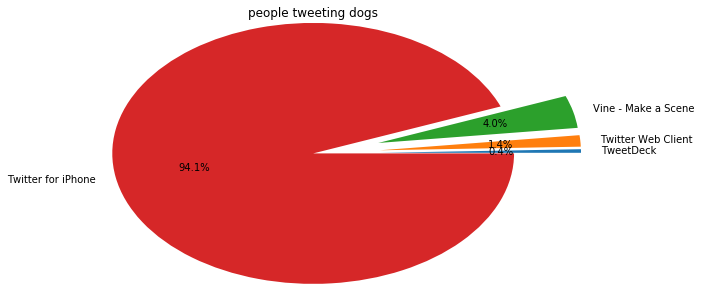

In [66]:
# check pie plot of number of tweets for each source to find out
# the main platform customers use
category_rating = twitter_archive_master.groupby(by=['source_tag']).count().sort_values(by=['tweet_id'])
x = category_rating.index.values.astype('str')
y = category_rating.rating_ratio.values
plt.title('people tweeting dogs', y = 1.1)
plt.pie(y, labels=x, radius=1.5, autopct='%1.1f%%', explode=[0.5, 0.5, 0.5, 0])
plt.show()

### Insights:
1. The most common order for dogs is: pupper, doggo, puppo, doggopupper, floofer, doggopuppo, doggofluffer.

2. Among the most common dogs, the top three popular order is: pupper, floofer, and doggo, doggopuppo has the highest rating but there is only 1 rating for it, so doggopuppo is not counted.

3. Most customers (94.1%) use iPhone to tweet dogs, TweetDeck is used the least (0.4%).